In [2]:
import pandas as pd
df = pd.read_csv('wines_SPA_outliers_removed.csv')

In [4]:
# EXAMINING THE DATA STRUCTURE 
print("DataFrame Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nDescriptive Statistics:\n", df.describe())

# IDENTIFIYING TARGETS AND VARIABLES IN ODER TO PLOT AND WORK ON IT
print("\nPotential Target Variable: rating (or rating_zscore)")
print("Potential Predictor Variables: price, price_zscore, body, body_zscore, acidity, acidity_zscore")

# CHECK FOR MISSING VALUES 
print("\nMissing Values in 'rating':", df['rating'].isnull().sum())
print("Missing Values in 'price':", df['price'].isnull().sum())
print("Missing Values in 'body':", df['body'].isnull().sum())
print("Missing Values in 'acidity':", df['acidity'].isnull().sum())
print("Missing Values in 'rating_zscore':", df['rating_zscore'].isnull().sum())
print("Missing Values in 'price_zscore':", df['price_zscore'].isnull().sum())
print("Missing Values in 'body_zscore':", df['body_zscore'].isnull().sum())
print("Missing Values in 'acidity_zscore':", df['acidity_zscore'].isnull().sum())



DataFrame Shape: (7287, 17)

Data Types:
 winery                 object
wine                   object
year                  float64
rating                float64
num_reviews             int64
country                object
region                 object
price                 float64
type                   object
body                  float64
acidity               float64
year_zscore           float64
rating_zscore         float64
num_reviews_zscore    float64
price_zscore          float64
body_zscore           float64
acidity_zscore        float64
dtype: object

Descriptive Statistics:
               year       rating  num_reviews        price         body  \
count  6999.000000  7287.000000  7287.000000  7287.000000  6156.000000   
mean   2014.104729     4.245423   388.056539    43.362637     4.151884   
std       4.470670     0.096979   237.116003    46.514135     0.564159   
min    1994.000000     4.200000    25.000000     5.500000     3.000000   
25%    2011.000000     4.200000   389.

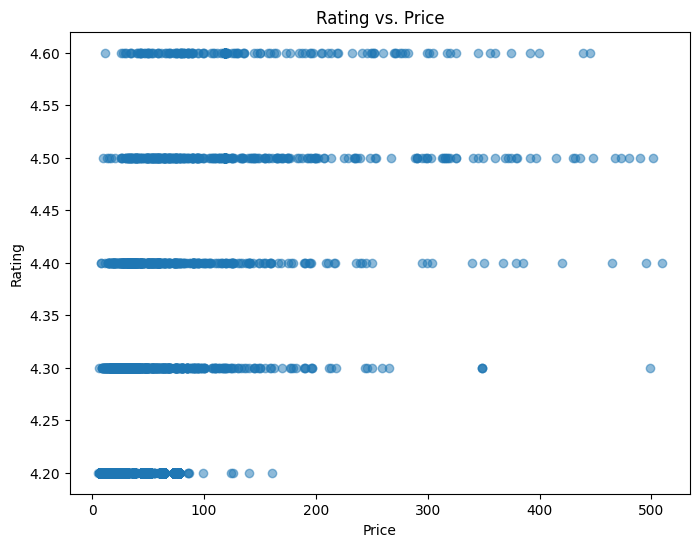

Description of Rating vs. Price plot:


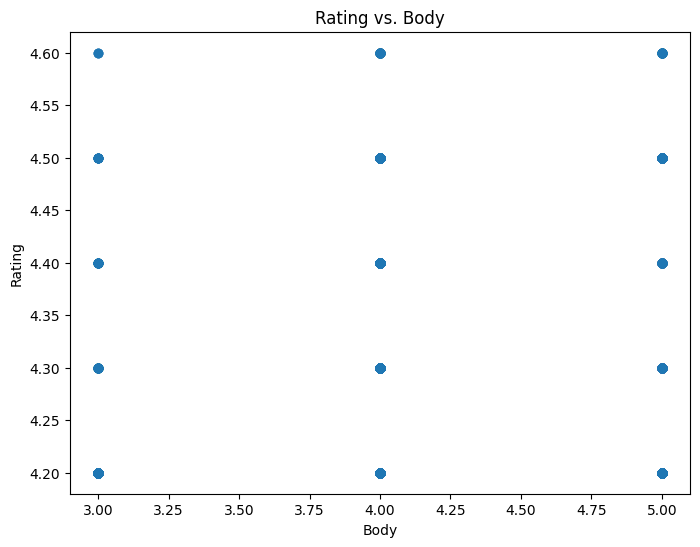


Description of Rating vs. Body plot:


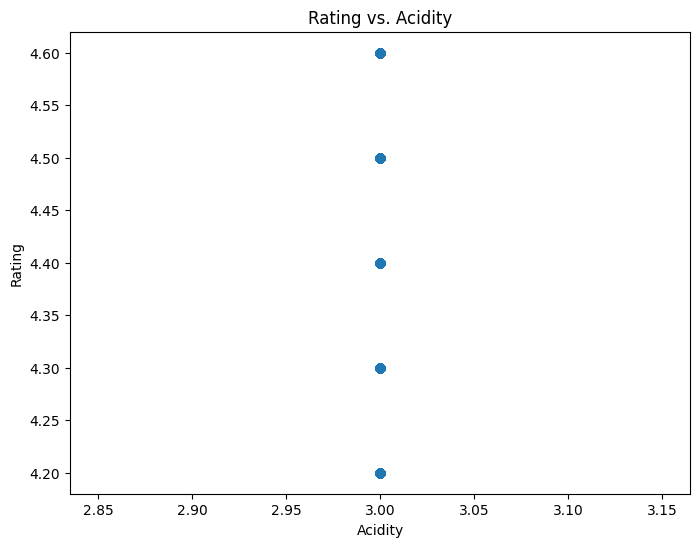

In [6]:
import matplotlib.pyplot as plt

# VISUALS 
#TOOK RATING AS A MAIN COMPARING FEATURE IN ORDER TO ANALYSE PROPERLY 

# REALTION BETWEEN PRICE AND RATING PLOTTED
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['rating'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Rating vs. Price')
plt.show()

print("Description of Rating vs. Price plot:")  

# RELATION BETWEEN BODY AND RATING
plt.figure(figsize=(8, 6))
plt.scatter(df['body'], df['rating'], alpha=0.5)
plt.xlabel('Body')
plt.ylabel('Rating')
plt.title('Rating vs. Body')
plt.show()

print("\nDescription of Rating vs. Body plot:")  

# RELATION BETWEEN ACIDITY AND RATING 
plt.figure(figsize=(8, 6))
plt.scatter(df['acidity'], df['rating'], alpha=0.5)
plt.xlabel('Acidity')
plt.ylabel('Rating')
plt.title('Rating vs. Acidity')
plt.show()

In [12]:
import numpy as np
  #Y = MX+c 
y = df['rating']
x = df['price']

# CALCULATING X AND Y FEATURE 
x_mean = np.mean(x)
y_mean = np.mean(y)

# CALCULATING SLOPE 
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
m = numerator / denominator

# CALCULATING INTECRCEPT 
b = y_mean - m * x_mean

# PRINT SLOP AND INTERCEPT 
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): 0.0011661858853334647
Intercept (b): 4.194854461263853


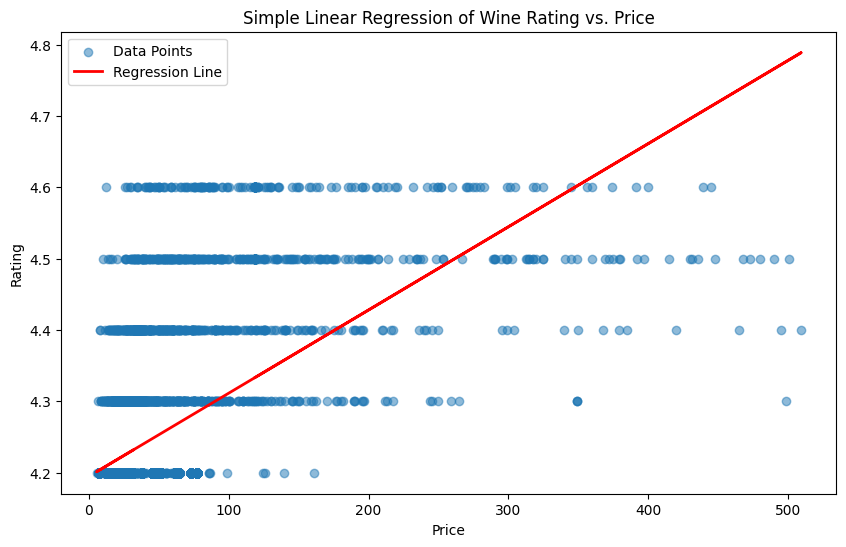

In [18]:
import matplotlib.pyplot as plt
df = df.dropna(subset=['body', 'acidity'])
# CREATING A SCATTER PLOT TO VISUALISE 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data Points')

y_pred = m * x + b

plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')


plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Simple Linear Regression of Wine Rating vs. Price")


plt.legend()

plt.show()